In [1]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [10]:
#-------------------------------------------------------------
# DEFINE BASIC FUNCTION FOR THE READING DATA FROM FILE
#-------------------------------------------------------------
import pandas as pd
#=======================================
# Define global variables for file path
#=======================================
def get_var(var_name):
    variable_filename = "variable/variable.txt"
    # Read the text file
    with open(variable_filename, 'r') as file:
        lines = file.readlines()

    # Initialize a dictionary to store the variables
    variables = {}

    # Process each line in the file
    for line in lines:
        # Split each line into variable name and value
        parts = line.strip().split(',')
        if len(parts) == 2:
            # Store the variable name and value in the dictionary
            variables[parts[0].strip()] = parts[1].strip()

    return variables[var_name]

#================================================================
# Define a function to read data from a CSV file into a DataFrame
#================================================================
def read_csv(filename, ec='ISO-8859-1'):
    try:
        # Load CSV data into DataFrame
        data_df = pd.read_csv(filename, encoding=ec)
        return data_df
    
    # Handle the case where the file is not found
    except FileNotFoundError:
        print("File not found. Please check the file path.")
        
    # Handle any other exceptions that might occur during reading the CSV file
    except Exception as e:
        print("An error occurred:", e)

In [35]:
#-------------------------------------------------------------
# DEFINE FUNCTIONS TO EXPLORE PCA COMPONENT & PERFORMANCE
#-------------------------------------------------------------
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Part I: explore PCA components of the dataset
# Find the good number of component for each model based on 
# the threshold of PCA according to 90%, 95%, & 99%
def PCA_components(data, n_components=None):
    # Build and apply PCA
    pca = PCA(n_components=n_components)    
    projected_data = pca.fit_transform(data)
    
    # compare the cumulative explained variance versus number of PCA components
    pca = PCA().fit(data)

    # Plot the cumulative explained variance versus number of PCA components
    plt.figure(figsize=(8, 6))#, facecolor='#F2EEE5')  # Set background color of the figure
    plt.scatter(projected_data[:, 0], projected_data[:, 1],
                c=range(len(projected_data)), edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('Spectral', len(projected_data)))
    plt.title('Principle Component Analysis of PPCs', fontweight='bold')
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.colorbar()
    # plt.gca().set_facecolor('#F2EEE5')  # Set background color inside the plot
    plt.show()
    
    cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')      
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance vs. Number of Components')
    plt.grid(True)
    plt.show()
    
    print("Withoutout Standardisation")
    # Determine number of components required to explain the specified percentage of variance
    explained_variance_thresholds=[0.8, 0.85, 0.90, 0.95, 0.99]
    for threshold in explained_variance_thresholds:
        # Determine number of components required to explain the specified percentage of variance
        pca = PCA(threshold).fit(data)
        print("%.0f%% variance is explained by: %d components." % ((threshold * 100), pca.n_components_))

def PCA_components_standardisation(data, n_components=None):    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    # Apply PCA
    pca = PCA()
    pca.fit(scaled_data)
    projected_data = pca.fit_transform(scaled_data)

    # Plot the cumulative explained variance versus number of PCA components
    plt.figure(figsize=(8, 6))#, facecolor='#F2EEE5')  # Set background color of the figure
    plt.scatter(projected_data[:, 0], projected_data[:, 1],
                c=range(len(scaled_data)), edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('Spectral', len(scaled_data)))
    plt.title('Principle Component Analysis of PPCs', fontweight='bold')
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.colorbar()
    # plt.gca().set_facecolor('#F2EEE5')  # Set background color inside the plot
    plt.show()

    # Calculate cumulative explained variance
    cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

    # Plot cumulative explained variance vs number of components
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')      
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance vs. Number of Components')
    plt.grid(True)
    plt.show()

    print("With Standardisation")
    # Determine number of components required to explain the specified percentage of variance
    explained_variance_thresholds=[0.8, 0.85, 0.90, 0.95, 0.99]
    
    for threshold in explained_variance_thresholds:
        # Determine number of components required to explain the specified percentage of variance
        pca = PCA(threshold).fit(scaled_data)
        print("%.0f%% variance is explained by: %d components." % ((threshold * 100), pca.n_components_))  

# Part II: Create Dataset with PCA components, explored above
# Ojective: 
# Obj_1: Finallize the list exploratory variables have strong influence to extracted papers.
# Obj_2: Define the common function to 
def perform_pca(df, file_name, n_components):
    # Data preprocessing: Standardization
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    
    # Perform PCA
    pca = PCA(n_components=n_components)    
    principal_components = pca.fit_transform(df_scaled)
    
    # compare the cumulative explained variance versus number of PCA components
    pca = PCA().fit(df_scaled)
    # print("Show Principle Components")
    # print(abs(pca.components_))
    
    result_df = pd.DataFrame(data=abs(pca.components_))
    result_df.columns = df.columns
    # file_name = str(n_components)+file_name
    result_df.to_csv(file_name, index=False)
    
    # Create a new DataFrame from the principal components
    principal_df = pd.DataFrame(data=principal_components, 
                                columns=[f'PC{i}' for i in range(1, n_components+1)])
    
    # Print explained variance ratio by each principal component
    pca_ns = PCA().fit(df)
    pca_s = PCA().fit(df_scaled)
    explained_variance_ratio = pca.explained_variance_ratio_
    print('Explained variation per principal component (no standardisation): {}'.format(pca_ns.explained_variance_ratio_))
    print('Explained variation per principal component (standardisation): {}'.format(pca_s.explained_variance_ratio_))
    for i, variance in enumerate(explained_variance_ratio):
        print(f"Principal Component {i+1}: {variance}")
    return principal_df

In [36]:
# Load the dataset
ppc_analysing_data_yearfilter_filepath =get_var('ppc_analysing_data_yearfilter_filepath')
pca_performance_filepath = get_var('pca_performance_filepath')

# Read data for analysing
ppc_data_df = read_csv(ppc_analysing_data_yearfilter_filepath)
ppc_data_df.columns
ppc_analysing_df = ppc_data_df[['Year','PPC_DOI', 'Article_Age_At_PPC',
       'Average_Citation_Before', 'Average_Citation_After', 'Agree',
       'Clarification', 'Question', 'Recommendation', 'Disagree', 'Influence']]

C:\Users\caola\AppData\Local\Temp\ipykernel_15732\2930777545.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('Spectral', len(projected_data)))


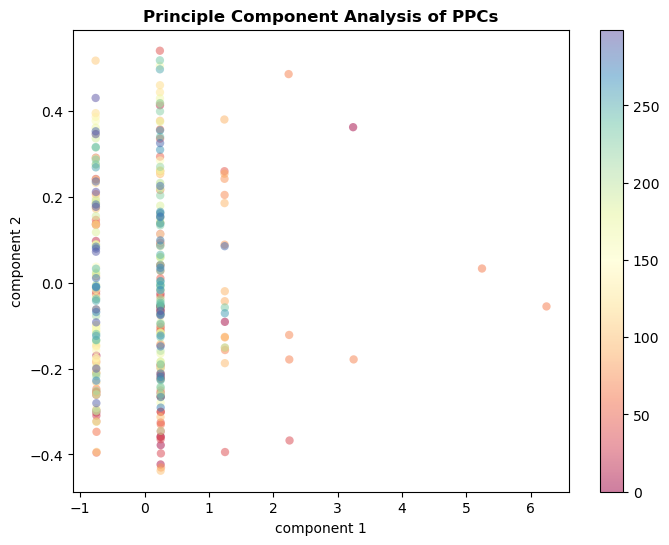

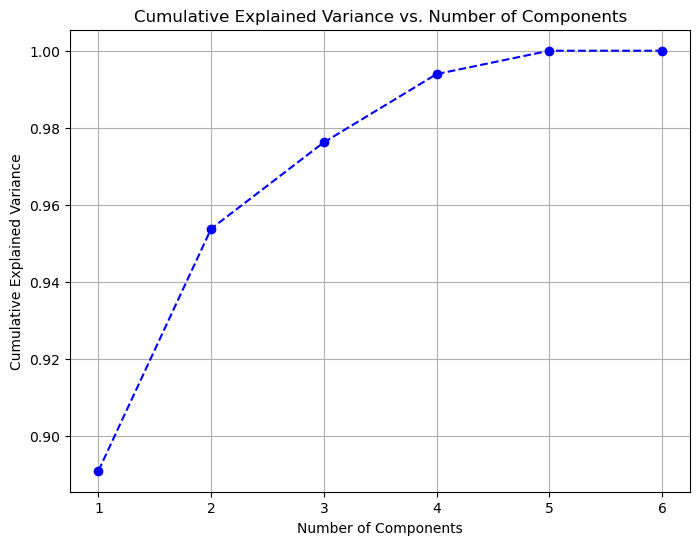

Withoutout Standardisation
80% variance is explained by: 1 components.
85% variance is explained by: 1 components.
90% variance is explained by: 2 components.
95% variance is explained by: 2 components.
99% variance is explained by: 4 components.
Explained variation per principal component (no standardisation): [8.90920258e-01 6.28573632e-02 2.24325800e-02 1.77214084e-02
 6.06839033e-03 1.33306442e-16]
Explained variation per principal component (standardisation): [3.36958919e-01 1.96363485e-01 1.68823274e-01 1.52368843e-01
 1.45485478e-01 4.29927944e-15]
Principal Component 1: 0.33695891936931405
Principal Component 2: 0.19636348523296557
Principal Component 3: 0.16882327448680795
Principal Component 4: 0.15236884290307992
Principal Component 5: 0.14548547800782832
Principal Component 6: 4.29927944240902e-15


In [37]:
#-------------------------------------------------------------
# Check PCA performance before apply standard scaler
#-------------------------------------------------------------
exploratory_vars = ppc_analysing_df[['Article_Age_At_PPC','Agree',
       'Clarification', 'Question', 'Recommendation', 'Disagree',]]

PCA_components(exploratory_vars,n_components=5)
PCA_perform_2 = perform_pca(exploratory_vars, pca_performance_filepath, n_components=5)

C:\Users\caola\AppData\Local\Temp\ipykernel_15732\2930777545.py:62: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('Spectral', len(scaled_data)))


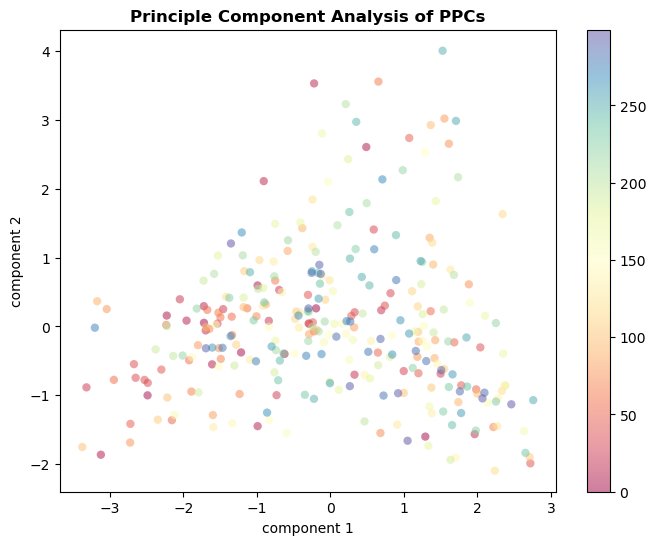

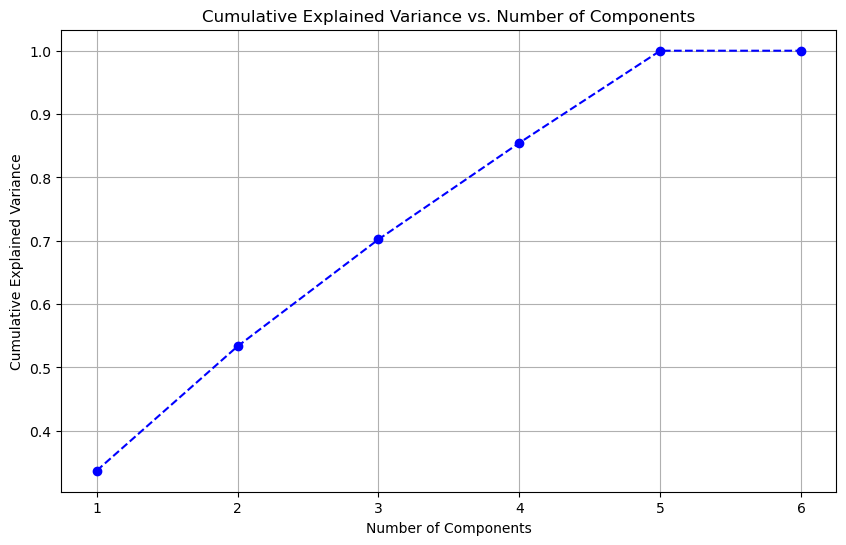

With Standardisation
80% variance is explained by: 4 components.
85% variance is explained by: 4 components.
90% variance is explained by: 5 components.
95% variance is explained by: 5 components.
99% variance is explained by: 5 components.
Explained variation per principal component (no standardisation): [8.90920258e-01 6.28573632e-02 2.24325800e-02 1.77214084e-02
 6.06839033e-03 1.33306442e-16]
Explained variation per principal component (standardisation): [3.36958919e-01 1.96363485e-01 1.68823274e-01 1.52368843e-01
 1.45485478e-01 4.29927944e-15]
Principal Component 1: 0.33695891936931405
Principal Component 2: 0.19636348523296557
Principal Component 3: 0.16882327448680795
Principal Component 4: 0.15236884290307992
Principal Component 5: 0.14548547800782832
Principal Component 6: 4.29927944240902e-15


In [38]:
#-------------------------------------------------------------
# Check PCA performance after apply standard scaler
#-------------------------------------------------------------
PCA_components_standardisation(exploratory_vars,n_components=5)
PCA_perform_2 = perform_pca(exploratory_vars, pca_performance_filepath, n_components=5)